# 14C-Daten

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

* [Daten aus dem Arbeitsgebiet (siehe Oslisly et al. 2013)](#Daten-aus-dem-Arbeitsgebiet-(siehe-Oslisly-et-al.-2013))
* [Datierungen Arbeitsgebiet Wotzka](#Datierungen-Arbeitsgebiet-Wotzka)

## Arbeitsgebiet

In [2]:
sql = """SELECT
           t_Ort.ort_name AS Fundort,
           't_ort'.'Kat-Nr' AS 'Fpl.',
           't_ort'.'ort_kurz' || ' ' || 't_komplex'.'bef_nr' AS 'Befund',
           t_14C.LABNR AS 'Labor-Nr.',
           't_14C'.'C14AGE' || ' \( \pm \) ' || 't_14C'.'C14STD' || ' bp' AS Radiokarbonalter,
           t_14C.MATERIAL,
           t_14C.SPECIES
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_Ort.ort_lit) Like '%DS%'))
       ORDER BY t_14C.C14AGE DESC""".replace('\n',' ')

df = pd.read_sql(sql, con)
df.to_latex('../output/tabs/Kat-B_Tab_14Cdatings_nwCongo.tex', longtable = True, index = False, escape = False, encoding='utf8')
#display(df.head())
df

,Fundort,Fpl.,Befund,Labor-Nr.,Radiokarbonalter,MATERIAL,SPECIES
0,Mobaka,246,MKA 87/102,KI-2894,2270 \( \pm \) 160 bp,Charcoal,HK 1
1,Mitula,251,MIT 87/103,KI-2895,2230 \( \pm \) 100 bp,Charcoal,HK 1
2,Maluba,230,MLB 85/1-3-2,KI-2445,2140 \( \pm \) 200 bp,Charcoal,HK 36
3,Munda,304,MUN 87/2-1-1,KI-2887,2020 \( \pm \) 180 bp,Charcoal,C; HK 9
4,Munda,304,MUN 87/2-1-1,KI-2881,1990 \( \pm \) 45 bp,Elaeis guineensis,"A, Bo1/Palmkern"
5,Munda,304,MUN 87/2-1-3,KI-2888,1990 \( \pm \) 65 bp,Charcoal,HK 8
6,Maluba,230,MLB 85/1-3-2,GrN-13585,1990 \( \pm \) 60 bp,Charcoal,HK 33
7,Munda,304,MUN 87/2-1-3,KI-2876,1980 \( \pm \) 41 bp,Charcoal,HK 2
8,Pikunda,255,PIK 87/1,KI-2877,1980 \( \pm \) 100 bp,Charcoal,HK 11
9,Likwala-Esobe km 186,291,LKW 186 87/186,KI-2893,1960 \( \pm \) 90 bp,Charcoal,HK 2


In [3]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           't_ort'.'ort_kurz' || ' ' || 't_komplex'.'bef_nr' AS 'Befund',
           t_14C.MATERIAL,
           t_14C.SPECIES
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_Ort.ort_lit) Like '%DS%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,LABNR,C14AGE,C14STD,Ort,Befund,MATERIAL,SPECIES
0,KI-2893,1960,90,Likwala-Esobe km 186 (Fpl. 291),LKW 186 87/186,HK,HK 2
1,KI-2882,1110,110,Munda (Fpl. 304),MUN 87/1,HK,HK 8 und 10
2,KI-2883,870,180,Munda (Fpl. 304),MUN 87/1,HK,HK 9
3,KI-2884,250,40,Munda (Fpl. 304),MUN 87/1,HK,HK 28
4,KI-2881,1990,45,Munda (Fpl. 304),MUN 87/2-1-1,Bo 1/Palmkern,A
5,KI-2885,1800,90,Munda (Fpl. 304),MUN 87/2-1-1,HK 6,C
6,KI-2886,1910,80,Munda (Fpl. 304),MUN 87/2-1-1,HK 8,A
7,KI-2887,2020,180,Munda (Fpl. 304),MUN 87/2-1-1,HK 9,C
8,KI-2876,1980,41,Munda (Fpl. 304),MUN 87/2-1-3,HK,HK 2
9,KI-2888,1990,65,Munda (Fpl. 304),MUN 87/2-1-3,HK,HK 8


In [4]:
df['C14AGE'].describe()

count      23.000000
mean     1576.086957
std       613.179042
min       250.000000
25%       990.000000
50%      1910.000000
75%      1990.000000
max      2270.000000
Name: C14AGE, dtype: float64

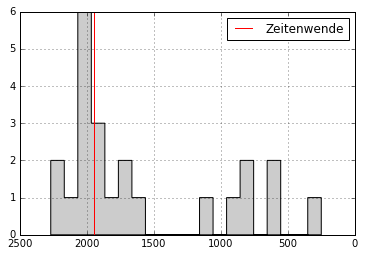

In [5]:
bins = df['C14AGE'].max() - df['C14AGE'].min()
df['C14AGE'].hist(color = 'grey', bins = round(bins/100), histtype='stepfilled', fc='#CCCCCC').invert_xaxis()
plt.axvline(x = 1950, color='r', label = 'Zeitenwende')
legend = plt.legend(loc=1)
legend.get_frame().set_facecolor('white')

In [6]:
print('''Plot()
{''')
for index, row in df.iterrows():
    print('R_Date("', row['Ort'],'-', row['LABNR'],'",', row['C14AGE'],',', row['C14STD'],');')
print('};')

Plot()
{
R_Date(" Likwala-Esobe km 186 (Fpl. 291) - KI-2893 ", 1960 , 90 );
R_Date(" Munda (Fpl. 304) - KI-2882 ", 1110 , 110 );
R_Date(" Munda (Fpl. 304) - KI-2883 ", 870 , 180 );
R_Date(" Munda (Fpl. 304) - KI-2884 ", 250 , 40 );
R_Date(" Munda (Fpl. 304) - KI-2881 ", 1990 , 45 );
R_Date(" Munda (Fpl. 304) - KI-2885 ", 1800 , 90 );
R_Date(" Munda (Fpl. 304) - KI-2886 ", 1910 , 80 );
R_Date(" Munda (Fpl. 304) - KI-2887 ", 2020 , 180 );
R_Date(" Munda (Fpl. 304) - KI-2876 ", 1980 , 41 );
R_Date(" Munda (Fpl. 304) - KI-2888 ", 1990 , 65 );
R_Date(" Munda (Fpl. 304) - KI-2889 ", 1650 , 80 );
R_Date(" Munda (Fpl. 304) - KI-2890 ", 1680 , 90 );
R_Date(" Maluba (Fpl. 230) - GrN-13584 ", 1670 , 110 );
R_Date(" Maluba (Fpl. 230) - KI-2444 ", 1930 , 120 );
R_Date(" Maluba (Fpl. 230) - GrN-13585 ", 1990 , 60 );
R_Date(" Maluba (Fpl. 230) - KI-2445 ", 2140 , 200 );
R_Date(" Mitula (Fpl. 251) - KI-2895 ", 2230 , 100 );
R_Date(" Mobaka (Fpl. 246) - KI-2894 ", 2270 , 160 );
R_Date(" Pikunda (Fpl. 2

In [7]:
display(df.head())

,LABNR,C14AGE,C14STD,Ort,Befund,MATERIAL,SPECIES
0,KI-2893,1960,90,Likwala-Esobe km 186 (Fpl. 291),LKW 186 87/186,HK,HK 2
1,KI-2882,1110,110,Munda (Fpl. 304),MUN 87/1,HK,HK 8 und 10
2,KI-2883,870,180,Munda (Fpl. 304),MUN 87/1,HK,HK 9
3,KI-2884,250,40,Munda (Fpl. 304),MUN 87/1,HK,HK 28
4,KI-2881,1990,45,Munda (Fpl. 304),MUN 87/2-1-1,Bo 1/Palmkern,A


In [8]:
df.pivot_table(values = 'C14AGE', index = ['Befund'], aggfunc = [len, np.min, np.mean, np.max])

,len,amin,mean,amax
Befund,,,,
LKW 186 87/186,1,1960,1960.000000,1960
MIT 87/103,1,2230,2230.000000,2230
MKA 87/102,1,2270,2270.000000,2270
MLB 85/1-3-1,2,1670,1800.000000,1930
MLB 85/1-3-2,2,1990,2065.000000,2140
MLB 85/1-4-3,2,580,695.000000,810
MUN 87/1,3,250,743.333333,1110
MUN 87/2-1-1,4,1800,1930.000000,2020
MUN 87/2-1-3,2,1980,1985.000000,1990


## Datierungen aus der Literatur im Arbeitsgebiet

* Auch keine Datierungen aus Wotzka 1995

Boundig-Box für die Beschreibung des Arbeitsgebiets
* <code>xmin=15.5, xmax=20, ymin=-1.2, ymax=5.2</code>

Lit != DS

In [6]:
sql = """SELECT
           t_Ort.ort_name AS Fundort,
           t_14C.LABNR AS 'Labor-Nr.',
           't_14C'.'C14AGE' || ' \( \pm \) ' || 't_14C'.'C14STD' || ' bp' AS Radiokarbonalter,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           t_14C.Lit,
           t_Ort.ort_lit
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_Ort.ort_lit) Not Like '%DS%')
           AND ((t_Ort.ort_lit) Not Like '%Wotzka%')
           AND ((t_Ort.x_long) > 15.5)
           AND ((t_Ort.x_long) < 20)
           AND ((t_Ort.y_lat) > -1.2)
           AND ((t_Ort.y_lat) < 5.2))
        ORDER BY t_14C.C14AGE DESC""".replace('\n',' ')

df = pd.read_sql(sql, con)

df.to_latex('../output/tabs/Kat-B_Tab_14Cdatings_Lit.tex', longtable=True)

display(df.head())

,Fundort,Labor-Nr.,Radiokarbonalter,MATERIAL,SPECIES,Lit,ort_lit
0,Owando,Gif-5218,33800 \( \pm \) 800 bp,None,None,Kouyoumontzakis u.a. 1985,Kouyoumontzakis u.a. 1985
1,Oyo,Gif-5701,31000 \( \pm \) 2200 bp,None,None,Kouyoumontzakis u.a. 1985,Kouyoumontzakis u.a. 1985
2,Mokobo,KIA-38067,12620 \( \pm \) 55 bp,None,None,Morin-Rivat 2014,Morin-Rivat 2014
3,Oyo,Gif-5700,9410 \( \pm \) 170 bp,None,None,Kouyoumontzakis u.a. 1985,Kouyoumontzakis u.a. 1985
4,Owando,Gif-4157,5040 \( \pm \) 150 bp,C,?,Clist 1989,Kouyoumontzakis u.a. 1985


In [7]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.Lit,
           t_Ort.ort_name,
           t_Ort.ort_land,
           t_Ort.ort_lit
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_Ort.ort_lit) Not Like '%DS%')
           AND ((t_Ort.ort_lit) Not Like '%Wotzka%')
           AND ((t_Ort.x_long) > 15.5)
           AND ((t_Ort.x_long) < 20)
           AND ((t_Ort.y_lat) > -1.2)
           AND ((t_Ort.y_lat) < 5.2))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [8]:
df['C14AGE'].describe()

count       70.000000
mean      2449.271429
std       5509.873238
min         15.000000
25%        593.750000
50%       1525.000000
75%       1799.500000
max      33800.000000
Name: C14AGE, dtype: float64

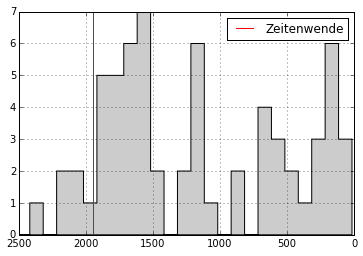

In [9]:
bins = df['C14AGE'].max() - df['C14AGE'].min()
df['C14AGE'].hist(color = 'grey', bins = bins/100, histtype='stepfilled', fc='#CCCCCC').invert_xaxis()
plt.axvline(x = 1950, color='r', label = 'Zeitenwende')
legend = plt.legend(loc=1)
plt.xlim([2500,0])
legend.get_frame().set_facecolor('white')

In [10]:
df.pivot_table(values = 'C14AGE', index = ['ort_land', 'ort_name'], aggfunc = [len, np.min, np.mean, np.max])

len  amin          mean   amax
ort_land ort_name                                                
CAF      Batalimo                    8   240   1509.750000   1990
         Bobélé 2                    1  1200   1200.000000   1200
         Bodingue                    3   270    663.333333   1240
         Boua (Pos B)                2  1140   1175.000000   1210
         Bécaré II                   1  1870   1870.000000   1870
         Eyo                         2  1020   1110.000000   1200
         Lingbadongo                 4    70    292.250000    559
         Mbaere                      3   834   1789.000000   2362
         Mondongué                   1   140    140.000000    140
         Ndele (Pos A)               1   210    210.000000    210
         Ngotto (Pos C)              1  1650   1650.000000   1650
         Pendèrè-Senguè/Gobongo 1    1  1620   1620.000000   1620
         Sabélé                      2   630    672.500000    715
         Sikilongo                   1   870    870.000000    870
CMR      Boulou River                1  1510   1510.000000   1510
COG      Djaka River                 1   335    335.000000    335
         Ebaleki River               1   315    315.000000    315
         Ilamba 1                    1  1515   1515.000000   1515
         Ilamba 2                    1  2095   2095.000000   2095
         Kabo                        1  1800   1800.000000   1800
         Komo River                  1  1200   1200.000000   1200
         Liouesso                    1  1580   1580.000000   1580
         Lopola                      1   140    140.000000    140
         Loundoungou                 2    15    887.500000   1760
         Mokobo                      3   215   4790.000000  12620
         Ndoki River                 1  1715   1715.000000   1715
         Ngombe                      2   675   1220.000000   1765
         Owando                      2  5040  19420.000000  33800
         Oyo                         2  9410  20205.000000  31000
         Pokola 1                    1  1565   1565.000000   1565
         Pokola 2                    1   620    620.000000    620
         Potoli River                1  4610   4610.000000   4610

# 14C-Daten in DB

In [23]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())
len(df.index)

1344

liefert Anzahl 14C-Daten in DB

In [24]:
df_pivot = df.pivot_table(values = 'C14AGE', index = 'SITE', aggfunc = [len, np.min, np.mean, np.max])
display(df_pivot.head())

,len,amin,mean,amax
SITE,,,,
725,1,755,755.000000,755
85/22,1,140,140.000000,140
85/26,1,360,360.000000,360
Abala,1,2960,2960.000000,2960
Abang Minko'o,6,2181,2236.666667,2286


In [25]:
df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.sort_values(by=['len'], ascending=[False])
# display(df_pivot.head())
df_pivot[:10]

,SITE,len,amin,mean,amax
86,Campo,44,895,3512.500000,20500
178,Iyonda,31,40,2159.032258,8750
151,Gombe-Point,27,220,12564.444444,46500
324,Mouanko-Lobethal,23,156,2164.608696,8913
81,Bwambe-Sommet (Est),22,1760,2291.954545,2550
12,Akonetye,22,1685,1825.954545,2429
389,Oboui,21,1615,2539.761905,3995
457,Shum Laka,18,40,3529.444444,8705
188,Kamoa,16,295,2386.250000,6025
279,Mbandaka,16,0,1009.062500,2160


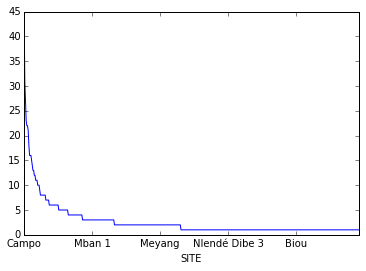

In [26]:
df_pivot.plot(x = 'SITE', y = 'len', legend=False)

14C-Daten bezogen auf Fpl.

In [27]:
df_pivot['len'].describe()

count    494.000000
mean       2.720648
std        3.981562
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       44.000000
Name: len, dtype: float64

je Bef:

In [16]:
df_pivot = df.pivot_table(values = 'C14AGE', index = ['SITE', 'PHASE'], aggfunc = [len, np.min, np.mean, np.max])
display(df_pivot.head())

len  amin    mean   amax
SITE          PHASE                          
Abang Minko'o 06/1     2  2236  2253.0   2270
              06/2     4  2181  2228.5   2286
Abeke         00       1  5565  5565.0   5565
Abong Mbang   33-9     1     0     0.0      0
Agondje       00       3   740  3900.0  10030

In [17]:
bins = df['C14AGE'].max() - df['C14AGE'].min()
df['C14AGE'].hist(color = 'grey', bins = bins/1000, histtype='stepfilled', fc='#CCCCCC').invert_xaxis()
plt.axvline(x = 1950, color='r', label = 'Zeitenwende')
legend = plt.legend(loc=2)
legend.get_frame().set_facecolor('white')

## Abgleich mit Hannoveraner Daten

* Daten aus Zentralafrika
    * alles ohne Hv
    * nur Hv
    
-- beides in CalPal (mit HPW besprechen)

## nur Daten jünger als 3000 bp

In [18]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
        WHERE t_14C.C14AGE < 3500""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())
len(df.index)

1153

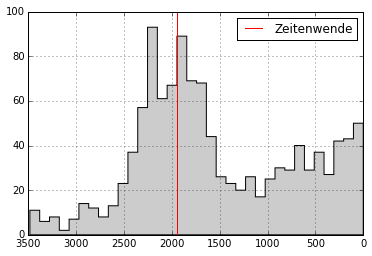

In [19]:
bins = df['C14AGE'].max() - df['C14AGE'].min()
df['C14AGE'].hist(color = 'grey', bins = bins/100, histtype='stepfilled', fc='#CCCCCC').invert_xaxis()
plt.axvline(x = 1950, color='r', label = 'Zeitenwende')
legend = plt.legend(loc=1)
legend.get_frame().set_facecolor('white')

## Daten aus dem Arbeitsgebiet (siehe Oslisly et al. 2013)
als Krtik daran zu verstehen

In [16]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
        WHERE t_14C.C14AGE <= 2400
            AND t_14C.C14AGE >= 200
            AND t_ort.y_lat <= 4
            AND t_ort.y_lat >= -1.5
            AND t_ort.x_long >= 10.5
            AND t_ort.x_long <= 15""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())
len(df.index)

137

In [17]:
plt.style.use('classic')

bins = df['C14AGE'].max() - df['C14AGE'].min()

ax = plt.subplot(111)

df['C14AGE'].hist(color = 'grey', bins = round(bins/100), fc='#808080').invert_xaxis()
plt.axvline(x = 1950, color='r', label = 'Zeitenwende')
legend = plt.legend(loc=1)
plt.xlabel("unkalibriertes 14C-Alter (bp)")
plt.ylabel("Anzahl")
plt.xlim([2400,200])
legend.get_frame().set_facecolor('white')
#ax.xaxis.grid(False)
ax.yaxis.grid(False)
# ax.get_xaxis().set_tick_params(which='major', direction='out')
plt.savefig('../output/figs/2-3_14C_Vgl_Oslisly2013.pdf', bbox_inches='tight')

C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


das gleiche noch mal, nur ohne Datierungen aus Hv-

In [23]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
        WHERE t_14C.C14AGE <= 2400
            AND t_14C.C14AGE >= 200
            AND t_ort.y_lat <= 4
            AND t_ort.y_lat >= -1.5
            AND t_ort.x_long >= 10.5
            AND t_ort.x_long <= 15
            AND t_14C.LABNR NOT LIKE '%Hv%'""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

bins = df['C14AGE'].max() - df['C14AGE'].min()

ax = plt.subplot(111)

df['C14AGE'].hist(color = 'grey', bins = round(bins/100), fc='#808080').invert_xaxis()
plt.axvline(x = 1950, color='r', label = 'Zeitenwende')
legend = plt.legend(loc=1)
plt.xlabel("unkalibriertes 14C-Alter (bp)")
plt.ylabel("Anzahl")
plt.xlim([2400,200])
legend.get_frame().set_facecolor('white')
#ax.xaxis.grid(False)
ax.yaxis.grid(False)
# ax.get_xaxis().set_tick_params(which='major', direction='out')
plt.savefig('../output/figs/2-3_14C_Vgl_Oslisly2013_ohneHv.pdf', bbox_inches='tight')

C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


In [20]:
len(df)

126

C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


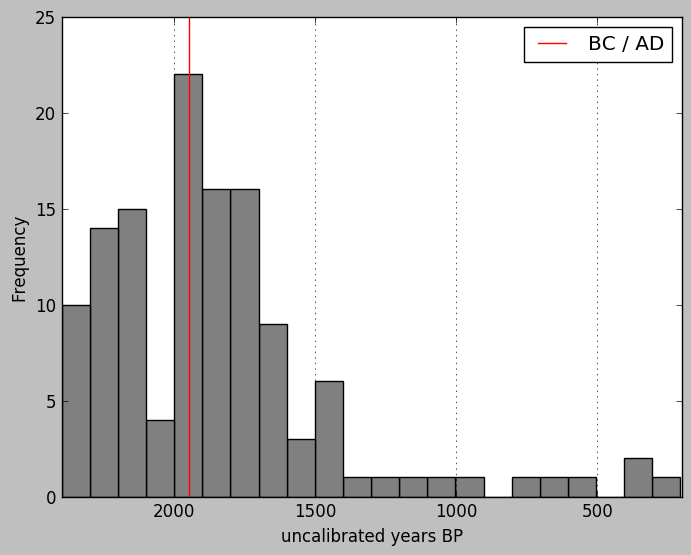

In [24]:
ax = plt.subplot(111)

df['C14AGE'].hist(color = 'grey', bins = round(bins/100), fc='#808080').invert_xaxis()
plt.axvline(x = 1950, color='r', label = 'BC / AD')
legend = plt.legend(loc=1)
plt.xlabel("uncalibrated years BP")
plt.ylabel("Frequency")
plt.xlim([2400,200])
legend.get_frame().set_facecolor('white')
#ax.xaxis.grid(False)
ax.yaxis.grid(False)
# ax.get_xaxis().set_tick_params(which='major', direction='out')
plt.savefig('../output/figs/2-3_14C_Vgl_Oslisly2013_ohneHv_engl.pdf', bbox_inches='tight')